In [12]:
from bs4 import BeautifulSoup, Tag
import numpy as np
import pandas as pd
import torch
import constants
import secrets
import re
import requests
import pprint
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

import certifi
import json

In [13]:
def get_jsonparsed_data(url):

    response = urlopen(url, cafile=certifi.where())
    data = response.read().decode("utf-8")
    return json.loads(data)

In [14]:
url_sentiment = (f"https://financialmodelingprep.com/api/v4/stock-news-sentiments-rss-feed?page=1&page=200&apikey=b0446da02c01a0943a01730dc2343e34")
sentiment_news = get_jsonparsed_data(url_sentiment)
print(f"{len(sentiment_news)} articles retrieved")
pprint.pprint(sentiment_news)


C:\Users\trexx\AppData\Local\Temp/ipykernel_19716/1748608114.py:3: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


100 articles retrieved
[{'image': 'https://ml.globenewswire.com/Resource/Download/4ae39821-dc27-47be-b5bb-18ae8a0245e8',
  'publishedDate': '2023-06-22T12:00:00.000Z',
  'sentiment': 'Positive',
  'sentimentScore': 0.9897,
  'site': 'globenewswire',
  'symbol': 'FA',
  'text': 'TORONTO and TEL AVIV, Israel, June 22, 2023 (GLOBE NEWSWIRE) -- '
          'NurExone Biologic Inc. ("NurExone" or the "Company") (TSXV: NRX) '
          '(FSE: J90) (NRX.V), is pleased to report positive imaging results '
          'from an internal preclinical study of its investigational drug '
          'ExoPTEN. The image analysis and measurements confirmed successful '
          'nerve regeneration following traumatic transection of the spinal '
          'cord in rats. These imaging results align with previous results '
          'showing a remarkable recovery of motor functi...',
  'title': 'Regeneration and Reinnervation of Spinal Cord in Rats Treated with '
           "NurExone's Intranasal ExoPTEN",
 

In [15]:
aapl_news = [x for x in sentiment_news if x["symbol"] == "AAPL"]
print(f"{len(aapl_news)} aapl articles in this batch")
pprint.pprint(aapl_news)

2 aapl articles in this batch
[{'image': 'https://cdn.benzinga.com/files/images/story/2023/06/22/iphone_12-5724014_1920.jpg?optimize=medium&dpr=1&auto=webp&height=800&width=1456&fit=crop',
  'publishedDate': '2023-06-22T11:55:41.000Z',
  'sentiment': 'Positive',
  'sentimentScore': 0.5574,
  'site': 'benzinga',
  'symbol': 'AAPL',
  'text': 'On Wednesday, Apple Inc (NASDAQ: AAPL) said it had fixed two new '
          'security faults in its iPhones and iPads that helped compromise '
          'thousands of devices in Russia. Apple credited researchers from '
          'Russian security software maker Kaspersky Lab for discovering the '
          'glitches, the Washington Post reports. Apple said the fixes would '
          'protect iPhones running iOS 15.7 or earlier versions, which became '
          'outdated in September. ...Full story available on Benzinga.com...',
  'title': 'Apple Patches Security Glitches in iPhones and iPads: Protection '
           'Against Russian Hacking Att

In [16]:
df = pd.read_csv(constants.DATA_PATH)
print(df.head())

Empty DataFrame
Columns: [date, AAPL]
Index: []


In [20]:
from datetime import datetime
ticker = "AAPL"
for i in range(100):
    page = str(i)
    url = (f"https://financialmodelingprep.com/api/v4/stock-news-sentiments-rss-feed?page={page}&apikey=b0446da02c01a0943a01730dc2343e34")
    sentiment_news = get_jsonparsed_data(url)


    for news in sentiment_news:
        if news["symbol"] == ticker:
            dateOnly = news["publishedDate"].split("T")[0]
            row = {"date":str(dateOnly), ticker:news["sentimentScore"]}
            df = df.append(row, ignore_index=True)

collapsed_df = df.groupby('date')['AAPL'].mean()

print(collapsed_df)
collapsed_df.to_csv(constants.DATA_PATH, index=False)
print("done")

C:\Users\trexx\AppData\Local\Temp/ipykernel_19716/1748608114.py:3: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


         date      AAPL
0  2023-05-23  0.821750
1  2023-05-24  0.997400
2  2023-05-25  0.959625
3  2023-05-27  0.989100
4  2023-05-28  0.995900
5  2023-05-29  0.680800
6  2023-05-30  0.997400
7  2023-05-31  0.998767
8  2023-06-01  0.984525
9  2023-06-02  0.977900
10 2023-06-03  0.892400
11 2023-06-04  0.998400
12 2023-06-05  0.982313
13 2023-06-06  0.388678
14 2023-06-07  0.928470
15 2023-06-08  0.998600
16 2023-06-09  0.996100
17 2023-06-10  0.998500
18 2023-06-11  0.945500
19 2023-06-12  0.999350
20 2023-06-13  0.995680
21 2023-06-14  0.996480
22 2023-06-15  0.999150
23 2023-06-16  0.998000
24 2023-06-18  0.992000
25 2023-06-19  0.990260
26 2023-06-20  0.999333
27 2023-06-21 -0.666200
28 2023-06-22  0.778300
29 2023-05-23  0.821750
30 2023-05-24  0.997400
31 2023-05-25  0.959625
32 2023-05-27  0.989100
33 2023-05-28  0.995900
34 2023-05-29  0.680800
35 2023-05-30  0.997400
36 2023-05-31  0.998767
37 2023-06-01  0.984525
38 2023-06-02  0.977900
39 2023-06-03  0.892400
40 2023-06-04  0

C:\Users\trexx\AppData\Local\Temp/ipykernel_19716/3868527224.py:14: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  collapsed_df = df.groupby('date')['AAPL'].mean().reset_index()


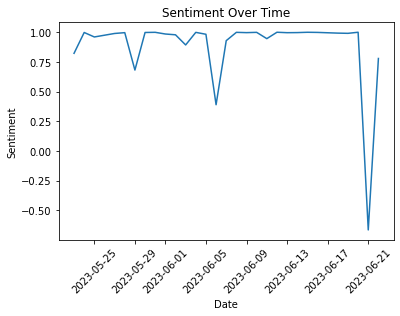

In [21]:

import matplotlib.pyplot as plt

# Assuming 'constants.DATA_PATH' contains the path to your CSV file
df = pd.read_csv(constants.DATA_PATH)

# Assuming 'date' and 'AAPL' are the column names in your DataFrame
if 'date' in df.columns and 'AAPL' in df.columns:
    # Convert the 'date' column to datetime type
    df['date'] = pd.to_datetime(df['date'])

    # Sort the DataFrame by the 'date' column
    df = df.sort_values('date')

    # Plot the line plot
    plt.plot(df['date'], df['AAPL'])

    # Set the labels for x and y axes
    plt.xlabel('Date')
    plt.ylabel('Sentiment')

    # Set the title of the plot
    plt.title('Sentiment Over Time')

    # Rotate the x-axis tick labels for better readability
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()